# NEURAL NETWORKS USING TENSORFLOW FOR DATASET OF HTRU 

# Phase 1: Data analysis & preparation

In [4]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import missingno as msno
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout

In [6]:
# Load the datset 
data = pd.read_csv('HTRU_2(cleaned).csv')

In [7]:
# Show number of rows and columns
data.shape

(17898, 9)

In [8]:
# Shows first five rows of the dataset
data.head()

,Mean_integrated,Standard_deviation_integrated,Excess_kurtosis_integrated,Skewness_integrated,Mean_DM-SNR,Standard_deviation_DM-SNR,Excess_kurtosis_DM-SNR,Skewness_DM-SNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [9]:
# Check for missing values
data.isnull().sum()

Mean_integrated                  0
Standard_deviation_integrated    0
Excess_kurtosis_integrated       0
Skewness_integrated              0
Mean_DM-SNR                      0
Standard_deviation_DM-SNR        0
Excess_kurtosis_DM-SNR           0
Skewness_DM-SNR                  0
Class                            0
dtype: int64

In [10]:
# Basic statistical details like percentile, mean, std etc. of a data frame
data.describe()

,Mean_integrated,Standard_deviation_integrated,Excess_kurtosis_integrated,Skewness_integrated,Mean_DM-SNR,Standard_deviation_DM-SNR,Excess_kurtosis_DM-SNR,Skewness_DM-SNR,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [11]:
# Unique values of the dtatset
data.nunique()

Mean_integrated                   8626
Standard_deviation_integrated    17862
Excess_kurtosis_integrated       17897
Skewness_integrated              17898
Mean_DM-SNR                       9000
Standard_deviation_DM-SNR        17894
Excess_kurtosis_DM-SNR           17895
Skewness_DM-SNR                  17895
Class                                2
dtype: int64

In [12]:
#  Distribute each column , split the input features and output parameters
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

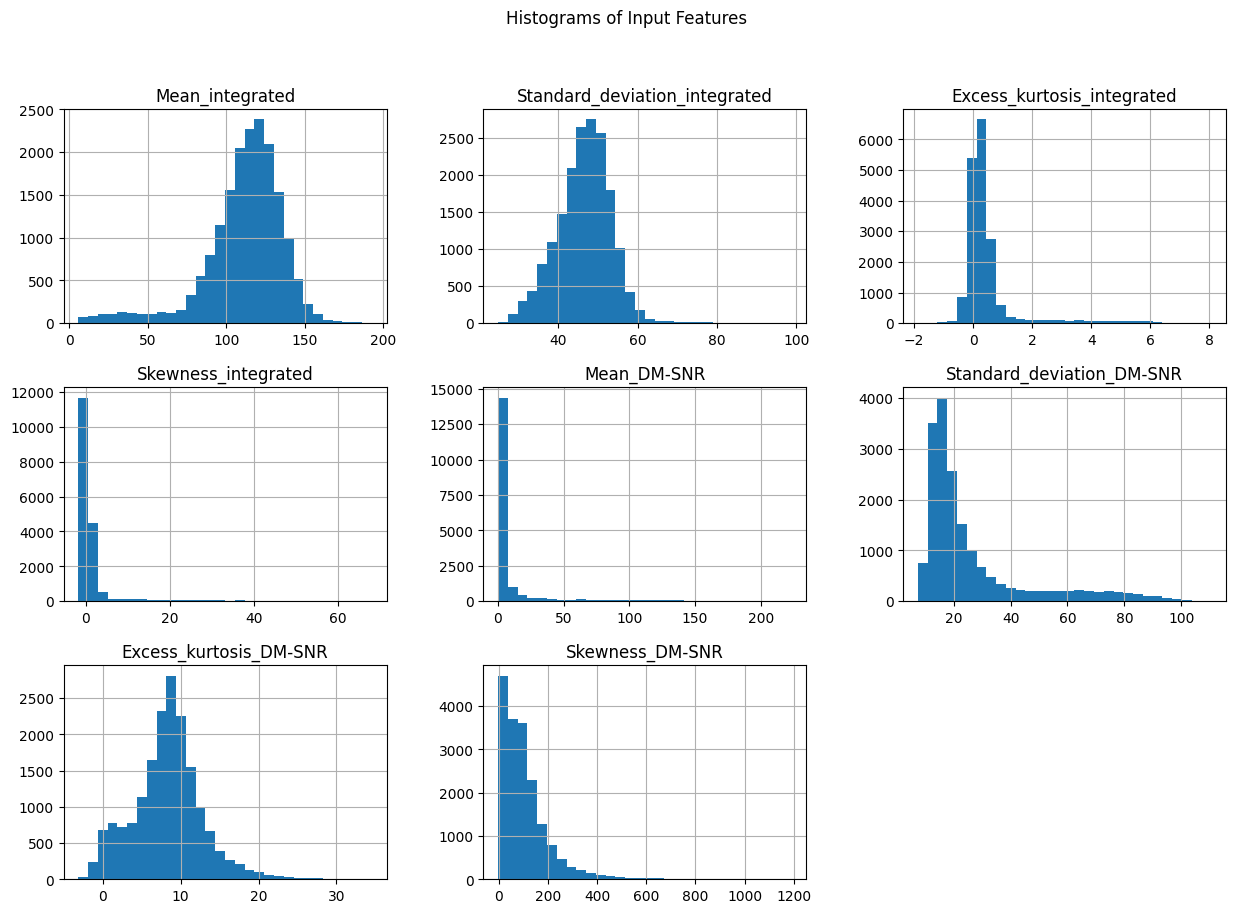

In [13]:
# Histograms for input features
input_features = data.columns[:-1]
data[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features")
plt.show()

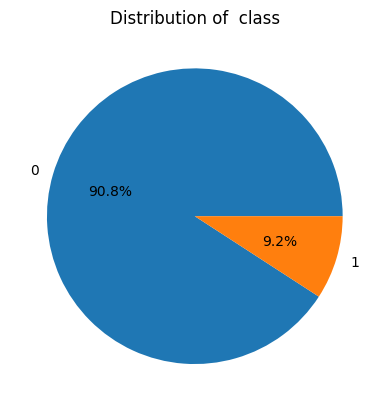

In [14]:
#  Pie chart for 'class' column
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=['0', '1'], autopct='%1.1f%%')
plt.title("Distribution of  class")

# Save the figure to a file
plt.savefig("distribution_of_class.png", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
from IPython.display import display
import imgkit
#  Shows first 10 rows of the dataset
first_10_rows = data.head(10)

# Display the first 10 rows in table format
display(first_10_rows.style.set_caption("First 10 Rows of the Dataset"))

# Save the table as an image 
config = imgkit.config(wkhtmltoimage= r'C:\Program Files\wkhtmltopdf\bin\wkhtmltoimage.exe')
table_html = first_10_rows.to_html(index=False)
imgkit.from_string(table_html, 'first_10_rows.png', options={'quality': 100}, config = config)

,Mean_integrated,Standard_deviation_integrated,Excess_kurtosis_integrated,Skewness_integrated,Mean_DM-SNR,Standard_deviation_DM-SNR,Excess_kurtosis_DM-SNR,Skewness_DM-SNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

### Normalize data

In [16]:
#  Normalize the data
data_normalized = (data.iloc[:, :-1] - data.iloc[:, :-1].min()) / (data.iloc[:, :-1].max() - data.iloc[:, :-1].min())
data_normalized['Class'] = data.iloc[:, -1]

In [17]:
# Display the first 10 rows of the normalized data in table format
display(data_normalized.head(10).style.set_caption("First 10 Rows of Normalized Data"))

# Save the table as an image 
table_html = data_normalized.head(10).to_html(index=False)
imgkit.from_string(table_html, 'first_10_rows_normalized.png', options={'quality': 100}, config = config)

,Mean_integrated,Standard_deviation_integrated,Excess_kurtosis_integrated,Skewness_integrated,Mean_DM-SNR,Standard_deviation_DM-SNR,Excess_kurtosis_DM-SNR,Skewness_DM-SNR,Class
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0
5,0.469784,0.296271,0.242110,0.031600,0.006376,0.069473,0.365216,0.111797,0
6,0.608507,0.324200,0.191792,0.024033,0.003522,0.018487,0.593047,0.403808,0
7,0.666848,0.203657,0.172710,0.031211,0.004514,0.067865,0.442652,0.167827,0
8,0.543014,0.376384,0.234145,0.028075,0.009493,0.068910,0.322202,0.092164,0
9,0.543055,0.198961,0.235472,0.042275,0.017323,0.170521,0.279634,0.050095,0


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

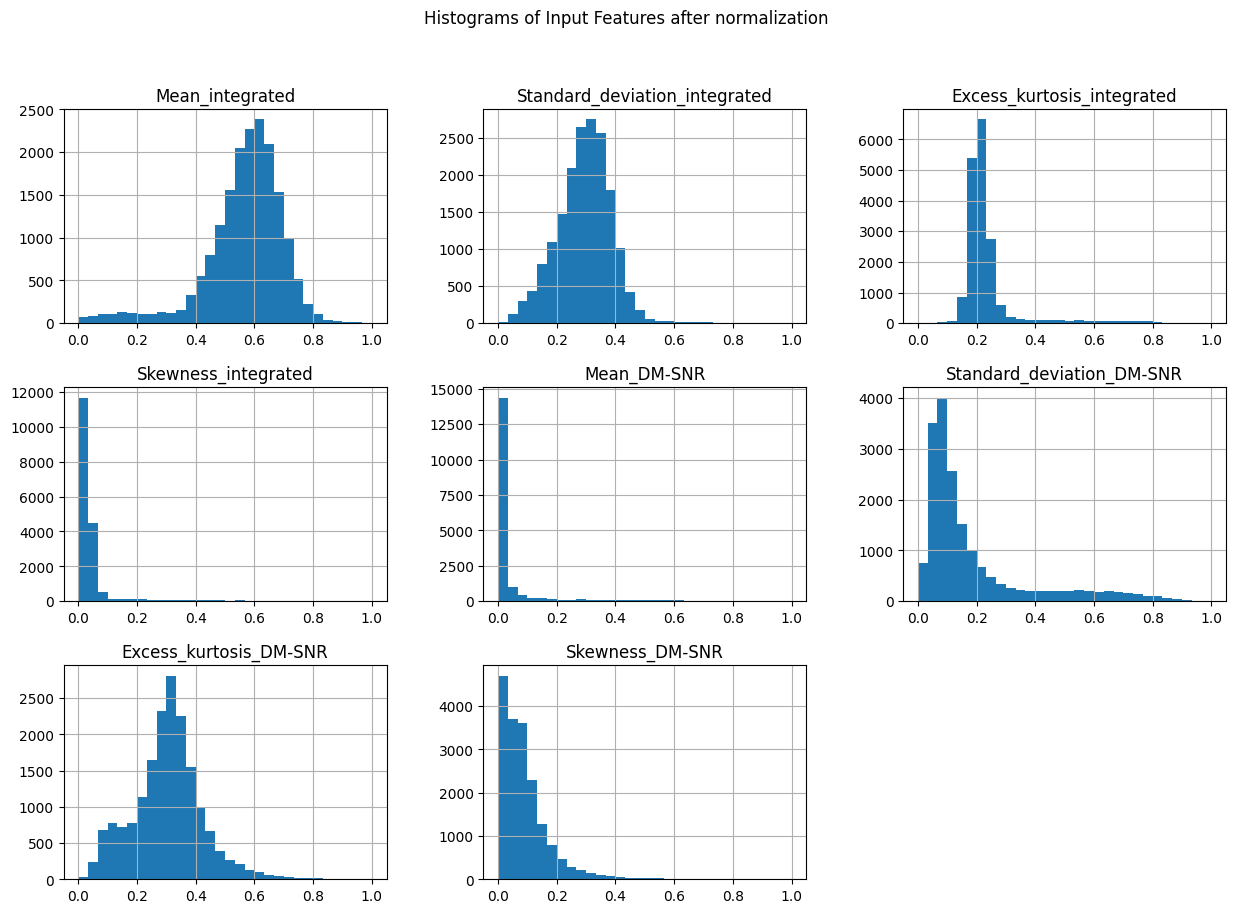

In [19]:
input_features = data_normalized.columns[:-1]
data_normalized[input_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Input Features after normalization")
plt.savefig("Histograms_of_Input_Features_after_normalization.png",bbox_inches ='tight')
plt.show()

### Phase 2: Build a model to overfit the entire dataset

In [20]:
# BUILD A MODEL WITH SINGLE LAYER AND SINGLE NEURON

# PART 1: Single layer, single neuron model
single_layer_model = Sequential()
single_layer_model.add(Dense(1, activation='sigmoid', input_dim=8))
single_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the data using Keras, TensorFlow
history_single_layer = single_layer_model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Print the accuracy
_, accuracy_single_layer = single_layer_model.evaluate(X, y, verbose=0)
print('Single Layer Model Accuracy: %.2f' % (accuracy_single_layer * 100))

Single Layer Model Accuracy: 97.70


In [21]:
# BUILD A MULTILAYER MODEL WITH MORE NEURONS

# PART 2: Multilayer model with Two layers
multi_layer_model = Sequential()
multi_layer_model.add(Dense(8, activation='relu'))
multi_layer_model.add(Dense(1, activation='sigmoid'))
multi_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the data using Keras, TensorFlow
history_multi_layer = multi_layer_model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Print the accuracy
_, accuracy_multi_layer = multi_layer_model.evaluate(X, y, verbose=0)
print('Multilayer Model 8- 1 Accuracy: %.2f' % (accuracy_multi_layer * 100))


Multilayer Model 8- 1 Accuracy: 97.88


In [22]:
# BUILD A MULTILAYER MODEL WITH MORE NEURONS

# PART 3: Multilayer model with more layers and more neurons
multi_layer_model_2 = Sequential()
multi_layer_model_2.add(Dense(16, activation='relu', input_dim=8))
multi_layer_model_2.add(Dense(8, activation='relu'))
multi_layer_model_2.add(Dense(1, activation='sigmoid'))
multi_layer_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the data using Keras, TensorFlow
history_multi_layer_2 = multi_layer_model_2.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Print the accuracy
_, accuracy_multi_layer = multi_layer_model_2.evaluate(X, y, verbose=0)
print('Multilayer Model 16-8-1 Accuracy: %.2f' % (accuracy_multi_layer * 100))


Multilayer Model 16-8-1 Accuracy: 97.97


In [23]:
# BUILD A MULTILAYER MODEL WITH MORE NEURONS THAN PREVIOUS MODEL

# PART 4: Multilayer model with more layers and more neurons

multi_layer_model_3 = Sequential()
multi_layer_model_3.add(Dense(64, activation='relu', input_dim=8))
multi_layer_model_3.add(Dense(32, activation='relu'))
multi_layer_model_3.add(Dense(16, activation='relu'))
multi_layer_model_3.add(Dense(1, activation='sigmoid'))
multi_layer_model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the data using Keras, TensorFlow
history_multi_layer_3 = multi_layer_model_3.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Print the accuracy
_, accuracy_multi_layer = multi_layer_model_3.evaluate(X, y, verbose=0)
print('Multilayer Model 64-32-16-1 Accuracy : %.2f' % (accuracy_multi_layer * 100))

Multilayer Model 64-32-16-1 Accuracy : 98.11


In [25]:
# BUILD A MULTILAYER MODEL WITH MORE NEURONS THAN PREVIOUS MODEL

# PART 5: Multilayer model with more layers and more neurons

multi_layer_model_4 = Sequential()
multi_layer_model_4.add(Dense(128, activation='relu', input_dim=8))
multi_layer_model_4.add(Dense(64, activation='relu'))
multi_layer_model_4.add(Dense(32, activation='relu'))
multi_layer_model_4.add(Dense(16, activation='relu'))
multi_layer_model_4.add(Dense(1, activation='sigmoid'))
multi_layer_model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the data using Keras, TensorFlow
history_multi_layer_4 = multi_layer_model_4.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Print the accuracy
_, accuracy_multi_layer = multi_layer_model_4.evaluate(X, y, verbose=0)
print('Multilayer Model 128-64-32-16-1 Accuracy 2: %.2f' % (accuracy_multi_layer * 100))

Multilayer Model 128-64-32-16-1 Accuracy 2: 98.14


In [26]:
# BUILD A MULTILAYER MODEL WITH MORE NEURONS 

# PART 6: Multilayer model with more layers and more neurons

multi_layer_model_5 = Sequential()
multi_layer_model_5.add(Dense(256, activation='relu', input_dim=8))
multi_layer_model_5.add(Dense(128, activation='relu'))
multi_layer_model_5.add(Dense(64, activation='relu'))
multi_layer_model_5.add(Dense(32, activation='relu'))
multi_layer_model_5.add(Dense(1, activation='sigmoid'))
multi_layer_model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the data using Keras, TensorFlow
history_multi_layer_5 = multi_layer_model_5.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Print the accuracy
_, accuracy_multi_layer = multi_layer_model_5.evaluate(X, y, verbose=0)
print('Multilayer Model 256-128-64-32-1 Accuracy 3: %.2f' % (accuracy_multi_layer * 100))

Multilayer Model 256-128-64-32-1 Accuracy 3: 97.94


In [28]:
# Add output as an additional input feature
X_extended = np.column_stack((X, y))

In [29]:
# Build a multilayer model with output as an additional input feature
multi_layer_model_ext = Sequential()
multi_layer_model_ext.add(Dense(128, activation='relu', input_dim=9))
multi_layer_model_ext.add(Dense(64, activation='relu'))
multi_layer_model_ext.add(Dense(32, activation='relu'))
multi_layer_model_ext.add(Dense(16, activation='relu'))
multi_layer_model_ext.add(Dense(1, activation='sigmoid'))
multi_layer_model_ext.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the extended input data
history_multi_layer_ext = multi_layer_model_ext.fit(X_extended, y, epochs=100, batch_size=32, verbose=0)

# Evaluate the accuracy
_, accuracy_multi_layer_ext = multi_layer_model_ext.evaluate(X_extended, y, verbose=0)
print('Multilayer Model with Extended Input Accuracy: %.2f' % (accuracy_multi_layer_ext * 100))

Multilayer Model with Extended Input Accuracy: 100.00


In [30]:
# Define a function that represents the model
def predict(model, input_data):
    return model.predict(input_data)

# Create a function that serves as a prediction model
def prediction_model(model, input_data):
    return predict(model, input_data)

# Test the prediction function with an example
test_input = X_extended[0]  # Take the first row of the extended input data as an example
prediction = prediction_model(multi_layer_model_ext, test_input.reshape(1, -1))
print(f'Prediction for the test input: {prediction}')

1/1 [==============================] - 0s 152ms/step
Prediction for the test input: [[3.5079214e-08]]


### Logistic regression

In [32]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train a logistic regression model with increased max_iter
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_scaled, y)

# Make predictions on the entire dataset
y_pred = log_reg_model.predict(X_scaled)

# Calculate the accuracy
log_reg_accuracy = accuracy_score(y, y_pred)
print('Logistic Regression Model Accuracy: %.2f' % (log_reg_accuracy * 100))

Logistic Regression Model Accuracy: 97.90


### Random baseline model

In [33]:
from sklearn.dummy import DummyClassifier

# Create and train a random baseline classifier on the entire dataset
random_baseline_model = DummyClassifier(strategy='stratified', random_state=42)
random_baseline_model.fit(X, y)

# Make predictions on the entire dataset
y_pred = random_baseline_model.predict(X)

# Calculate the accuracy
random_baseline_accuracy = accuracy_score(y, y_pred)
print('Random Baseline Classifier Accuracy: %.2f' % (random_baseline_accuracy * 100))

Random Baseline Classifier Accuracy: 83.42


### Compare above models

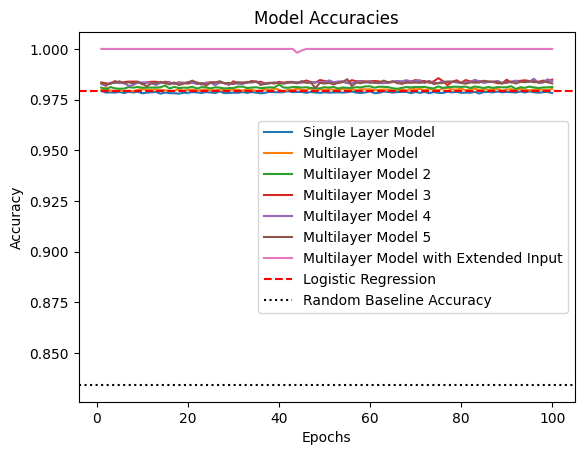

In [37]:
# I1)Train the single layer model for 10 epochs
history_single_layer = single_layer_model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# J1)Train the multilayer model for 10 epochs
history_multi_layer = multi_layer_model.fit(X, y, epochs=100, batch_size=32, verbose=0)
history_multi_layer_2 = multi_layer_model_2.fit(X, y, epochs=100, batch_size=32, verbose=0)
history_multi_layer_3 = multi_layer_model_3.fit(X, y, epochs=100, batch_size=32, verbose=0)
history_multi_layer_4 = multi_layer_model_4.fit(X, y, epochs=100, batch_size=32, verbose=0)
history_multi_layer_5 = multi_layer_model_5.fit(X, y, epochs=100, batch_size=32, verbose=0)

# K1)Train the multilayer model with extended input for 10 epochs
history_multi_layer_ext = multi_layer_model_ext.fit(X_extended, y, epochs=100, batch_size=32, verbose=0)
# Extract the accuracies
acc_single_layer = history_single_layer.history['accuracy']
acc_multi_layer = history_multi_layer.history['accuracy']
acc_multi_layer_2= history_multi_layer_2.history['accuracy']
acc_multi_layer_3 = history_multi_layer_3.history['accuracy']
acc_multi_layer_4 = history_multi_layer_4.history['accuracy']
acc_multi_layer_5 = history_multi_layer_5.history['accuracy']
acc_multi_layer_ext = history_multi_layer_ext.history['accuracy']

# Create an array with the epoch numbers
epochs = range(1, 101)

# Plot the accuracies
plt.plot(epochs, acc_single_layer, label='Single Layer Model')
plt.plot(epochs, acc_multi_layer, label='Multilayer Model')
plt.plot(epochs, acc_multi_layer_2, label='Multilayer Model 2')
plt.plot(epochs, acc_multi_layer_3, label='Multilayer Model 3')
plt.plot(epochs, acc_multi_layer_4, label='Multilayer Model 4')
plt.plot(epochs, acc_multi_layer_5, label='Multilayer Model 5')
plt.plot(epochs, acc_multi_layer_ext, label='Multilayer Model with Extended Input')
plt.axhline(log_reg_accuracy, color='red', linestyle='--', label='Logistic Regression')
plt.axhline(random_baseline_accuracy, color='black', linestyle='dotted', label='Random Baseline Accuracy')

# Add title and labels for axes
plt.title('Model Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()
plt.savefig("Model_accuracies.png",bbox_inches = 'tight')
# Display the plot
plt.show()

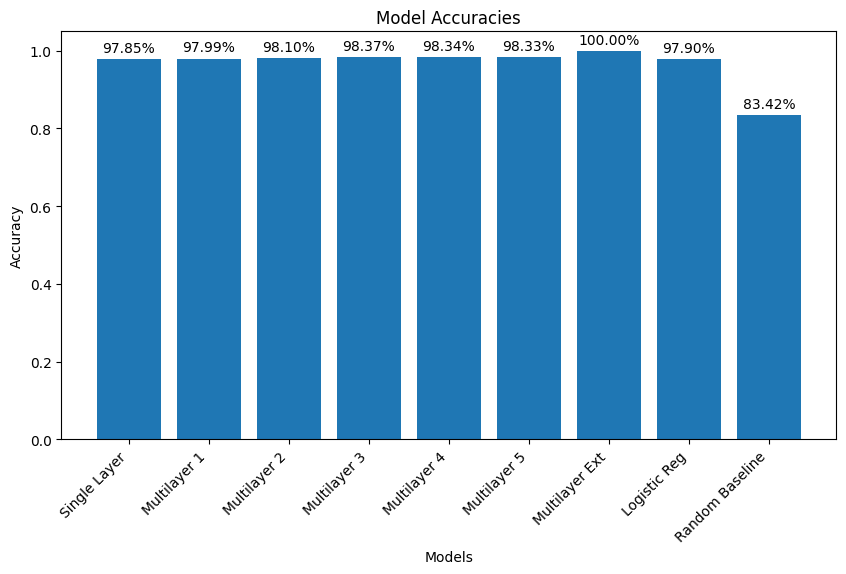

In [38]:
#REPRESENTATION USING BAR DIAGARAM

# Calculate the average accuracies
avg_acc_single_layer = np.mean(acc_single_layer)
avg_acc_multi_layer = np.mean(acc_multi_layer)
avg_acc_multi_layer2 = np.mean(acc_multi_layer_2)
avg_acc_multi_layer3 = np.mean(acc_multi_layer_3)
avg_acc_multi_layer4 = np.mean(acc_multi_layer_4)
avg_acc_multi_layer5 = np.mean(acc_multi_layer_5)
avg_acc_multi_layer_ext = np.mean(acc_multi_layer_ext)

# Prepare data for bar plot
models = ['Single Layer', 'Multilayer 1', 'Multilayer 2', 'Multilayer 3', 'Multilayer 4', 'Multilayer 5', 'Multilayer Ext', 'Logistic Reg', 'Random Baseline']
accuracies = [avg_acc_single_layer, avg_acc_multi_layer, avg_acc_multi_layer2, avg_acc_multi_layer3, avg_acc_multi_layer4, avg_acc_multi_layer5, avg_acc_multi_layer_ext, log_reg_accuracy, random_baseline_accuracy]

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size
bars = ax.bar(models, accuracies)

# Add percentage on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}%'.format(height * 100),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add title and labels for axes
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Rotate model names and adjust spacing
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2)
plt.savefig("model_accuracies_bar.png",bbox_inches='tight')
# Display the plot
plt.show()

### Phase 3: Model selection and evaluation

In [39]:
# Shuffle data
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

In [40]:
# Split data, test, and validation
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_val = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_val = y_shuffled[:split_index], y_shuffled[split_index:]     

In [41]:
# Print training and validation data
print("Training data (X_train):")
print(X_train)
print("\nTraining labels (y_train):")
print(y_train)

print("\nValidation data (X_val):")
print(X_val)
print("\nValidation labels (y_val):")
print(y_val)

Training data (X_train):
[[ 1.15210938e+02  5.94021849e+01  6.94625570e-02 ...  1.18087877e+01
   1.28631001e+01  2.12990488e+02]
 [ 1.13265625e+02  9.87789107e+01  1.79404339e-01 ...  6.47737893e+01
  -1.54935428e-01 -1.37463302e+00]
 [ 1.10375000e+02  4.70219364e+01  2.77741754e-01 ...  1.19211684e+01
   1.38742797e+01  2.32947025e+02]
 ...
 [ 1.26039062e+02  5.56244947e+01  2.72470026e-01 ...  1.92603176e+01
   6.84302269e+00  5.52945495e+01]
 [ 1.06890625e+02  3.95474862e+01  4.92840300e-01 ...  1.14539392e+01
   1.39324492e+01  2.41953150e+02]
 [ 1.27054688e+02  5.49838483e+01  2.53958100e-03 ...  3.89185070e+01
   3.45096830e+00  1.10115630e+01]]

Training labels (y_train):
[0 0 0 ... 0 0 0]

Validation data (X_val):
[[1.26234375e+02 5.11087206e+01 2.47765430e-02 ... 2.82741111e+01
  5.28094211e+00 3.01488251e+01]
 [1.26351562e+02 5.35101611e+01 3.90940359e-01 ... 1.26468127e+01
  1.04335368e+01 1.56704980e+02]
 [9.35156250e+01 4.21918950e+01 6.82862094e-01 ... 1.86302719e+01
  8

## Single layer model 

In [43]:
# PART 1: Single layer, single neuron model
single_layer_model = Sequential()
single_layer_model.add(Dense(1, activation='sigmoid', input_dim=8))
single_layer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the data using Keras, TensorFlow
history_single_layer = single_layer_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

# Print the accuracy
_, accuracy_single_layer_train = single_layer_model.evaluate(X_train, y_train, verbose=0)
_, accuracy_single_layer_val = single_layer_model.evaluate(X_val, y_val, verbose=0)
print('Single Layer Model Training Accuracy: %.2f' % (accuracy_single_layer_train * 100))
print('Single Layer Model Validation Accuracy: %.2f' % (accuracy_single_layer_val * 100))

Single Layer Model Training Accuracy: 97.78
Single Layer Model Validation Accuracy: 97.85


In [44]:
# Make predictions on the validation set
y_pred_val = (single_layer_model.predict(X_val) > 0.5).astype("int32")

# Calculate and print recall, precision, and F1 score
print('Recall: %.2f' % (recall_score(y_val, y_pred_val) * 100))
print('Precision: %.2f' % (precision_score(y_val, y_pred_val) * 100))
print('F1 Score: %.2f' % (f1_score(y_val, y_pred_val) * 100))

112/112 [==============================] - 0s 3ms/step
Recall: 84.85
Precision: 91.21
F1 Score: 87.91


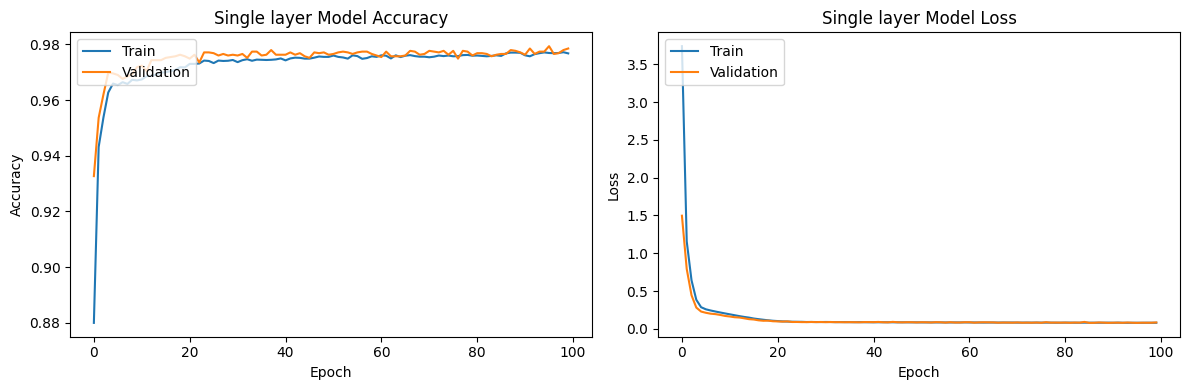

In [61]:
# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_single_layer.history['accuracy'])
plt.plot(history_single_layer.history['val_accuracy'])
plt.title('Single layer Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_single_layer.history['loss'])
plt.plot(history_single_layer.history['val_loss'])
plt.title('Single layer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig("single_layer_model_acc&loss.png",bbox_inches='tight')
plt.show()

## Multilayer model 

In [62]:
# Plotting, graphs, visualization
# Train model with checkpointing and L1_L2 regularization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping

# Use multi_layer_model instead of model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')

multi_layer_modelSS = Sequential()
multi_layer_modelSS.add(Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
multi_layer_modelSS.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
multi_layer_modelSS.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
multi_layer_modelSS.add(Dense(16, activation='relu', input_dim=8, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
multi_layer_modelSS.add(Dense(8, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
multi_layer_modelSS.add(Dense(1, activation='sigmoid'))
multi_layer_modelSS.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = multi_layer_modelSS.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[checkpoint, early_stopping])


Epoch 1/100
448/448 [==============================] - 8s 10ms/step - loss: 6.5347 - accuracy: 0.9513 - val_loss: 0.9005 - val_accuracy: 0.9497
Epoch 2/100
448/448 [==============================] - 4s 9ms/step - loss: 0.5450 - accuracy: 0.9575 - val_loss: 0.3618 - val_accuracy: 0.9595
Epoch 3/100
448/448 [==============================] - 3s 8ms/step - loss: 0.2971 - accuracy: 0.9635 - val_loss: 0.2588 - val_accuracy: 0.9668
Epoch 4/100
448/448 [==============================] - 4s 9ms/step - loss: 0.2433 - accuracy: 0.9673 - val_loss: 0.2336 - val_accuracy: 0.9665
Epoch 5/100
448/448 [==============================] - 4s 9ms/step - loss: 0.2239 - accuracy: 0.9694 - val_loss: 0.2172 - val_accuracy: 0.9707
Epoch 6/100
448/448 [==============================] - 3s 8ms/step - loss: 0.2155 - accuracy: 0.9705 - val_loss: 0.2130 - val_accuracy: 0.9729
Epoch 7/100
448/448 [==============================] - 3s 7ms/step - loss: 0.2136 - accuracy: 0.9702 - val_loss: 0.2126 - val_accuracy: 0.970

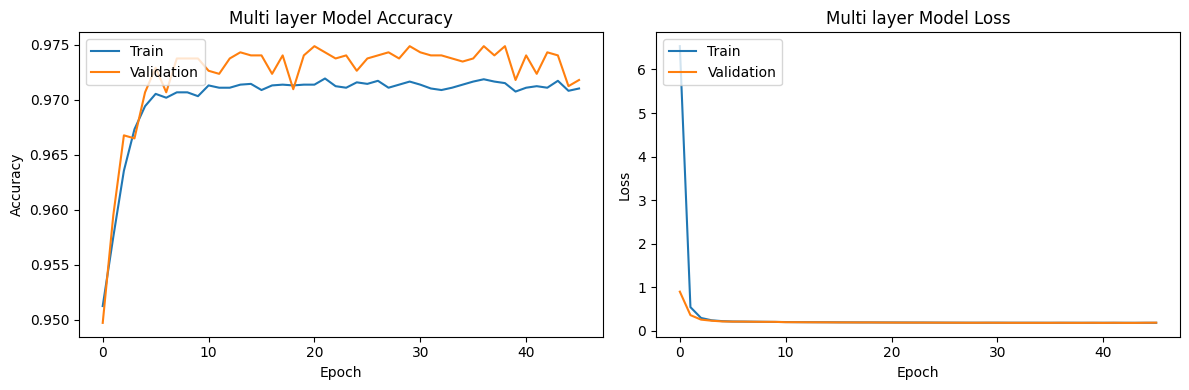

In [63]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Multi layer Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Multi layer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig("multi_layer_model_acc&loss.png",bbox_inches='tight')
plt.show()

In [47]:
#  Print accuracy and loss on both training and validation dataset
_, train_accuracyML = multi_layer_modelSS.evaluate(X_train, y_train, verbose=0)
_, val_accuracyML = multi_layer_modelSS.evaluate(X_val, y_val, verbose=0)
print('Training Accuracy: %.2f' % (train_accuracyML * 100))
print('Validation Accuracy: %.2f' % (val_accuracyML * 100))

# Print recall, precision, F1-score
y_val_pred = (multi_layer_modelSS.predict(X_val) > 0.5).astype(int).flatten()

true_positive = np.sum((y_val_pred == 1) & (y_val == 1))
false_positive = np.sum((y_val_pred == 1) & (y_val == 0))
false_negative = np.sum((y_val_pred == 0) & (y_val == 1))

recall = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
f1 = 2 * precision * recall / (precision + recall)

print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f1)

Training Accuracy: 96.95
Validation Accuracy: 97.07
112/112 [==============================] - 1s 3ms/step
Recall: 0.72
Precision: 0.94
F1 Score: 0.82


### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
# Create and train a logistic regression model with increased max_iter
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = log_reg_model.predict(X_val)

# Calculate the accuracy on the validation set
log_reg_val_accuracy = accuracy_score(y_val, y_pred_val)
print('Logistic Regression Model Validation Accuracy: %.2f' % (log_reg_val_accuracy * 100))

Logistic Regression Model Validation Accuracy: 97.96


In [49]:
# Make predictions on the training set
y_pred_train = log_reg_model.predict(X_train)

# Calculate the training accuracy
log_reg_train_accuracy = accuracy_score(y_train, y_pred_train)

# Calculate recall, precision, and F1 score for the validation set
recall = recall_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
f_score = 2 * precision * recall / (precision + recall)

# Print the metrics
print('Logistic Regression Model Training Accuracy: %.2f' % (log_reg_train_accuracy * 100))
print('Logistic Regression Model Validation Accuracy: %.2f' % (log_reg_val_accuracy * 100))
print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1 Score: %.2f' % f_score)

Logistic Regression Model Training Accuracy: 97.91
Logistic Regression Model Validation Accuracy: 97.96
Recall: 0.84
Precision: 0.93
F1 Score: 0.88


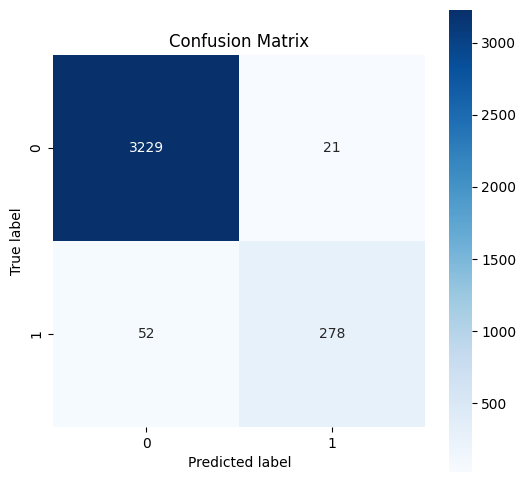

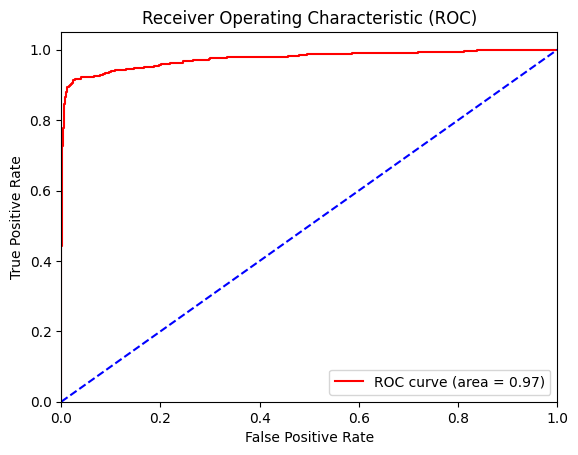

In [50]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Assuming y_val contains the true labels and y_pred_val_prob contains the predicted probabilities
y_pred_val_prob = log_reg_model.predict_proba(X_val)[:, 1] # Replace this with your predicted probabilities
fpr, tpr, _ = roc_curve(y_val, y_pred_val_prob)
roc_auc = roc_auc_score(y_val, y_pred_val_prob)

# Save the confusion matrix plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='.0f', square=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrixLR.png', bbox_inches='tight')
plt.show()

# Save the ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('roc_curveLR.png', bbox_inches='tight')
plt.show()

### Random baseline classifer 

In [51]:
from sklearn.dummy import DummyClassifier
# Create and train a random baseline classifier
random_baseline_model = DummyClassifier(strategy='stratified', random_state=42)
random_baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = random_baseline_model.predict(X_val)

# Calculate the accuracy on the validation set
random_baseline_val_accuracy = accuracy_score(y_val, y_pred_val)
print('Random Baseline Classifier Validation Accuracy: %.2f' % (random_baseline_val_accuracy * 100))

Random Baseline Classifier Validation Accuracy: 83.21


In [52]:
# Create and train a random baseline classifier
random_baseline_model = DummyClassifier(strategy='stratified', random_state=42)
random_baseline_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = random_baseline_model.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Training Accuracy: %.2f' % (train_accuracy * 100))

# Make predictions on the validation set
y_pred_val = random_baseline_model.predict(X_val)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation Accuracy: %.2f' % (validation_accuracy * 100))

# Calculate recall on the validation set
recall = recall_score(y_val, y_pred_val)
print('Recall: %.2f' % recall)

# Calculate precision on the validation set
precision = precision_score(y_val, y_pred_val)
print('Precision: %.2f' % precision)

# Calculate F1 score on the validation set
f1 = 2 * precision * recall / (precision + recall)
print('F1 Score: %.2f' % f1)

Training Accuracy: 83.29
Validation Accuracy: 83.21
Recall: 0.06
Precision: 0.07
F1 Score: 0.07


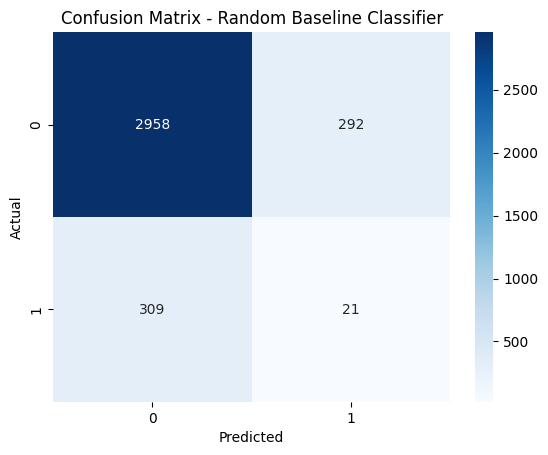

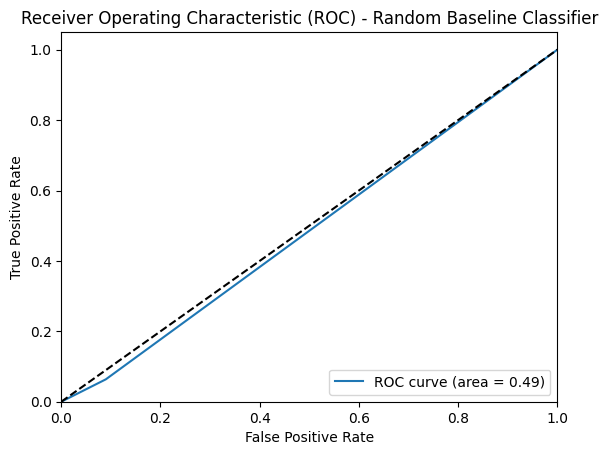

In [53]:
from sklearn.metrics import auc
# Plot confusion matrix
conf_mat = confusion_matrix(y_val, y_pred_val)
fig, ax = plt.subplots()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix - Random Baseline Classifier')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Plot ROC curve
y_pred_val_proba = random_baseline_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Baseline Classifier')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png', dpi=300)
plt.show()

### Custom prediction function 

In [54]:
from xgboost import XGBClassifier

def Custom_prediction_function(model, features):
    # Check the type of the model
    if isinstance(model, XGBClassifier):
        # For tree-based models, get the predictions and return them
        result = model.predict_proba(features)[:, 1]
    else:
        # For linear models, get the weights and bias from the model
        weights = model.coef_[0]
        bias = model.intercept_[0]

        # Calculate the sum of the weighted features and add the bias
        holder = []
        for row in features:
            value = []
            for i, w in enumerate(weights):                
                z = np.dot(w, row) + bias[i]
                value.append(z)

        # Apply the sigmoid activation function to get the predicted probability
        result = 1 / (1 + np.exp(-z))

    return result

In [55]:
# choose XGBCClassifier modelfor custom prediction function
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)
# Get the model's predictions for the training data using the custom prediction function
y_train_pred = (Custom_prediction_function(model, X_train) > 0.5).astype("int32")

# Get the model's predictions for the validation data using the custom prediction function
y_val_pred = (Custom_prediction_function(model, X_val) > 0.5).astype("int32")

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)

# Calculate the recall for the validation data
recall = recall_score(y_val, y_val_pred)

# Calculate the precision for the validation data
precision = precision_score(y_val, y_val_pred)

# Calculate the F1 score for the validation data
f1 = 2 * precision * recall / (precision + recall)

# Print the metrics
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy* 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Training Accuracy: 98.26%
Validation Accuracy: 98.07%
Recall: 86.97%
Precision: 91.69%
F1 Score: 89.27%


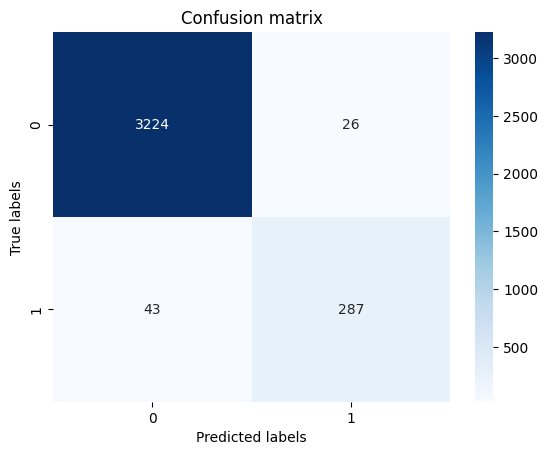

In [56]:
# Calculate the confusion matrix for the validation data
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.savefig('confusion_matrixpf.png', dpi=300)
plt.show()

In [57]:
# Store the accuracy scores
accuracy_scores = {'Single-layer Model': accuracy_single_layer_val * 100,
    'Multi-layer ModelSS': val_accuracyML * 100,
    'Logistic Regression Model': log_reg_val_accuracy * 100,
    'Random Baseline Classifier': random_baseline_val_accuracy * 100,
    'Custom prediction function':val_accuracy*100
}

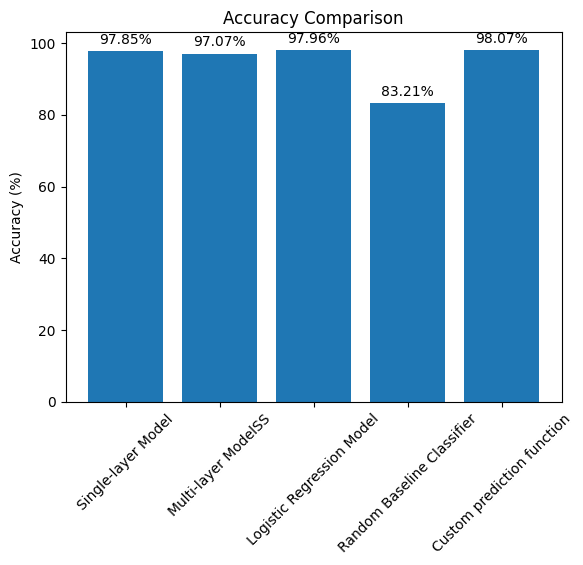

In [58]:
# Create a bar graph
fig, ax = plt.subplots()
bar_positions = range(len(accuracy_scores))
bar_heights = accuracy_scores.values()

bars = ax.bar(bar_positions, bar_heights)

# Set the ticks and labels for the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(accuracy_scores.keys(), rotation=45)

# Set the title and labels
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy (%)')

# Function to add percentage values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bars)
plt.savefig('Accuracy_comparision.png', dpi=300)
plt.show()

## Phase - 4  Feature importance and reduction

### Forward Selection with checkpointing

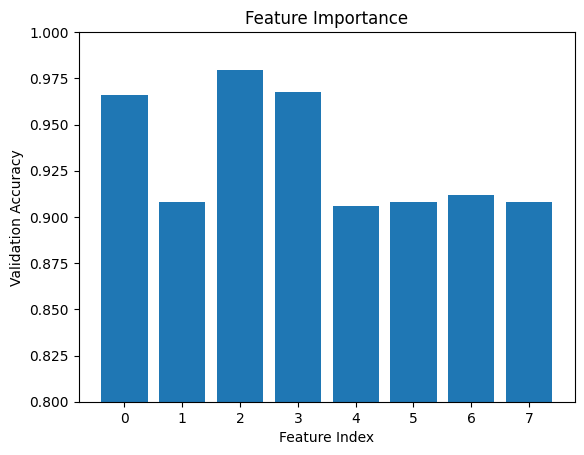

In [69]:
# Feature importance and model comparison
num_features = X.shape[1]
val_accuracies = []

for i in range(num_features):
    single_feature_model = Sequential()
    single_feature_model.add(Dense(2, activation='relu', input_dim=1))
    single_feature_model.add(Dense(1, activation='sigmoid'))
    single_feature_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train_single = X_train[:, i].reshape(-1, 1)
    X_val_single = X_val[:, i].reshape(-1, 1)

    checkpoint = ModelCheckpoint(f'single_feature_model_{i}.h5', monitor='val_accuracy', save_best_only=True, mode='max')
    
    single_feature_model.fit(X_train_single, y_train, epochs=100, batch_size=32, verbose=0,
                             validation_data=(X_val_single, y_val), callbacks=[checkpoint])
    
    _, single_feature_val_accuracy = single_feature_model.evaluate(X_val_single, y_val, verbose=0)
    val_accuracies.append(single_feature_val_accuracy)

# Plot validation accuracies
plt.bar(range(num_features), val_accuracies)
plt.xlabel('Feature Index')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1)
plt.title('Feature Importance')
plt.savefig('Accuracy_each_feature.png',dpi=300)
plt.show()

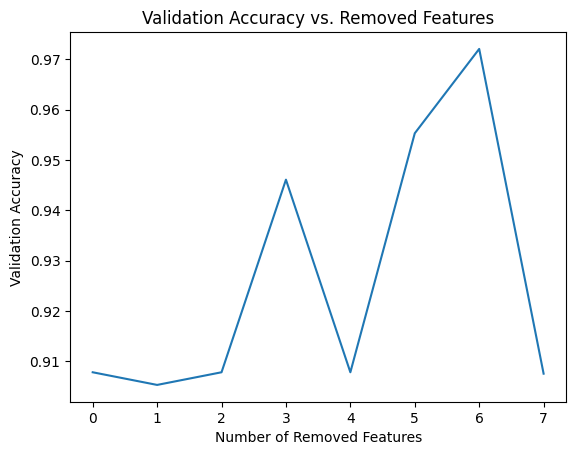

In [70]:
# Remove unimportant features and compare
sorted_indices = np.argsort(val_accuracies)
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    checkpoint = ModelCheckpoint(f'reduced_features_model_{i}.h5', monitor='val_accuracy', save_best_only=True, mode='max')

    reduced_features_model.fit(X_train_reduced, y_train, epochs=100, batch_size=32, verbose=0,
                               validation_data=(X_val_reduced, y_val), callbacks=[checkpoint])
    
    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=0)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)

# Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Removed Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Removed Features')
plt.savefig('performance.png',dpi=300)
plt.show()

### Feature selection using SHAP

[18:51:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


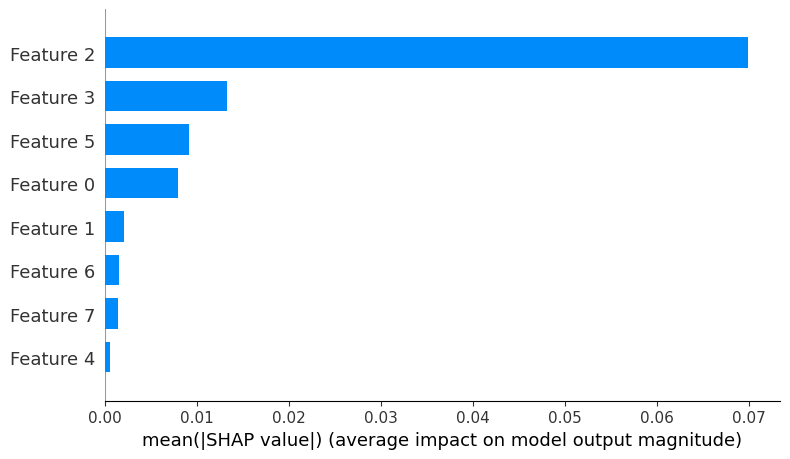

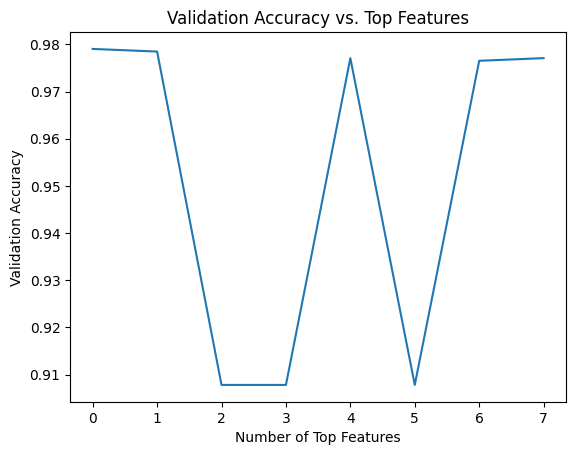

In [71]:
# Feature importance using SHAP values
import shap
import xgboost
# Train an XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# Explain the model's predictions using SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Plot the SHAP values for each feature
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Remove unimportant features and compare
num_features = X_train.shape[1]
sorted_indices = np.argsort(np.abs(shap_values.values).mean(0))[::-1]
val_accuracies_reduced_features = []

for i in range(num_features):
    reduced_features_indices = sorted_indices[:i+1]
    X_train_reduced = X_train[:, reduced_features_indices]
    X_val_reduced = X_val[:, reduced_features_indices]

    reduced_features_model = Sequential()
    reduced_features_model.add(Dense(2, activation='relu', input_dim=i+1))
    reduced_features_model.add(Dense(1, activation='sigmoid'))
    reduced_features_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    reduced_features_model.fit(X_train_reduced, y_train, epochs=100, batch_size=32, verbose=0)

    _, reduced_features_val_accuracy = reduced_features_model.evaluate(X_val_reduced, y_val, verbose=0)
    val_accuracies_reduced_features.append(reduced_features_val_accuracy)

# Plot validation accuracies
plt.plot(val_accuracies_reduced_features)
plt.xlabel('Number of Top Features')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Top Features')
plt.savefig('SHAP.png',dpi=300)
plt.show()  